In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict
from tensorflow import keras

from ch4_metrics import evaluate_classifier

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# transfusion dataset from https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
data = pd.read_csv('../data/transfusion.csv')
data = data.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'cc_of_blood_donated',
    'Time (months)': 'months_since_first_donation',
    'whether he/she donated blood in March 2007': 'donated_in_march_2007'
})

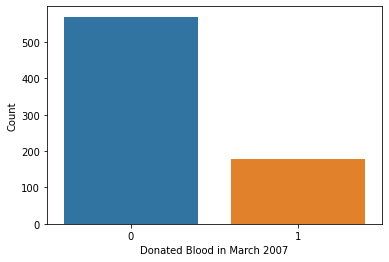

0    570
1    178
Name: donated_in_march_2007, dtype: int64


In [3]:
donated_in_march_countplot = sns.countplot(data=data, x='donated_in_march_2007')
donated_in_march_countplot.set(ylabel='Count', xlabel='Donated Blood in March 2007')
plt.show()

print(data['donated_in_march_2007'].value_counts())

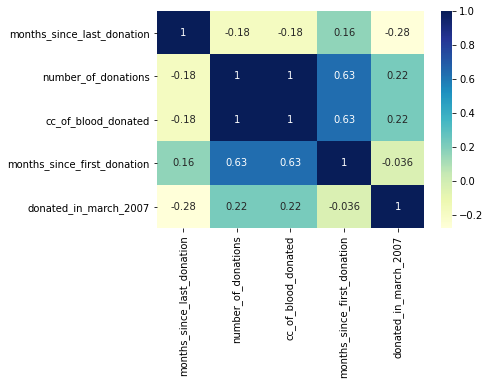

In [4]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [5]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [6]:
# full model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

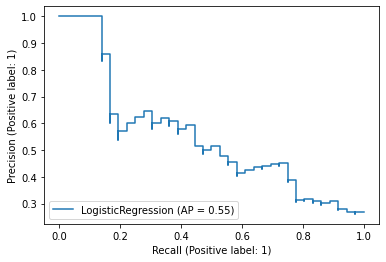

Accuracy: 0.7666666666666667
Null Accuracy:0.76


Confusion Matrix:
[[108   6]
 [ 29   7]]

F1 Score: 0.286
Precision: 0.538
Recall: 0.194


In [7]:
# evaluate model on single train test split
plot_precision_recall_curve(classifier, X_test, y_test)
plt.show()

evaluate_classifier(X_test, y_test, classifier)

In [11]:
# evaluate model with stratified 10 fold cross validation
y_pred = cross_val_predict(classifier, X, y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       570
           1       0.55      0.16      0.24       178

    accuracy                           0.77       748
   macro avg       0.67      0.56      0.55       748
weighted avg       0.73      0.77      0.72       748

